# BTC Price Prediction and Analysis

## Import Libraries

In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_bitcoin = pd.read_csv("BTC-Daily.csv", na_values='?')

In [3]:
df_bitcoin

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...,...,...
2646,1417478400,2014-12-02 00:00:00,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,1417392000,2014-12-01 00:00:00,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,1417305600,2014-11-30 00:00:00,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,1417219200,2014-11-29 00:00:00,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


In [4]:
df_bitcoin.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [5]:
df_bitcoin.isnull().any(axis=0)


unix          False
date          False
symbol        False
open          False
high          False
low           False
close         False
Volume BTC    False
Volume USD    False
dtype: bool

In [6]:
df_bitcoin.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2646    False
2647    False
2648    False
2649    False
2650    False
Length: 2651, dtype: bool

In [7]:
df_bitcoin.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [8]:
df_bitcoin.shape

(2651, 9)

In [9]:
df_bitcoin.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [10]:
def convert_datetime(timestamp):
    return dt.fromtimestamp(timestamp)

df_bitcoin['date'] = df_bitcoin['unix'].apply(convert_datetime)


In [11]:
df_bitcoin.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 11:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 11:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 11:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 11:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 11:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [12]:
df_bitcoin =df_bitcoin.drop(['unix','symbol'],axis=1)

In [13]:
df_bitcoin

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01 11:00:00,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2022-02-28 11:00:00,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2022-02-27 11:00:00,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2022-02-26 11:00:00,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2022-02-25 11:00:00,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...
2646,2014-12-02 11:00:00,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,2014-12-01 11:00:00,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,2014-11-30 11:00:00,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,2014-11-29 11:00:00,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


## Visualisation of Open, Close, High and Low prices against Date

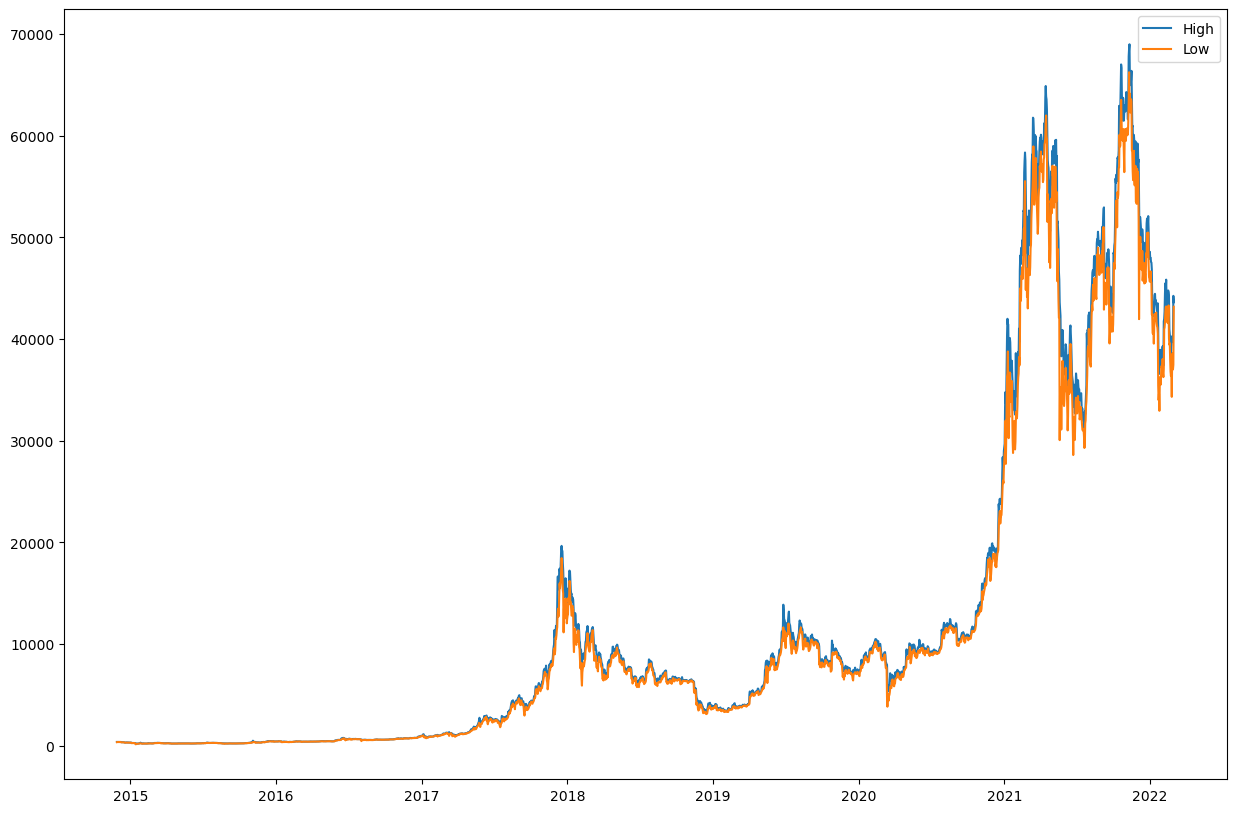

In [14]:
plt.figure(figsize=(15,10))
plt.plot(df_bitcoin['date'], df_bitcoin['high'], label='High')
plt.plot(df_bitcoin['date'], df_bitcoin['low'], label='Low')
plt.legend()
plt.show()

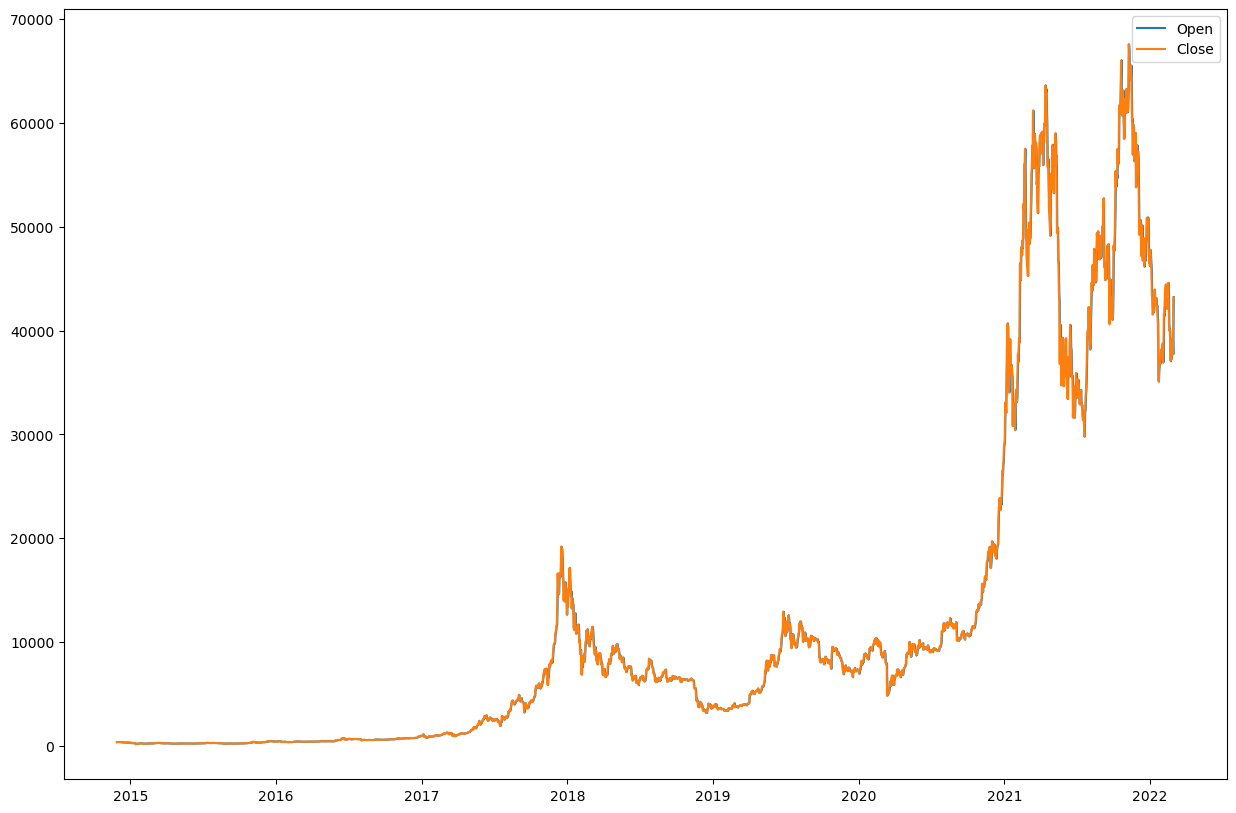

In [15]:
plt.figure(figsize=(15,10))
plt.plot(df_bitcoin['date'], df_bitcoin['open'], label='Open')
plt.plot(df_bitcoin['date'], df_bitcoin['close'], label='Close')
plt.legend()
plt.show()

Based on the above plots showing high and low points and open and close prices, it is true that the price of Bitcoin did increase after 2021, it was not a sudden rise, but rather a more gradual increase over time. Additionally, the plots show that there were also significant fluctuations in the price of Bitcoin during this time, with both high and low points. The open and close prices also indicate that the price of Bitcoin may have closed at a higher point than it opened on some days, but not on others. 

In [16]:
df_bitcoin['date']=pd.to_datetime(df_bitcoin['date']).dt.normalize()


In [17]:
df_bitcoin['date']

0      2022-03-01
1      2022-02-28
2      2022-02-27
3      2022-02-26
4      2022-02-25
          ...    
2646   2014-12-02
2647   2014-12-01
2648   2014-11-30
2649   2014-11-29
2650   2014-11-28
Name: date, Length: 2651, dtype: datetime64[ns]

In [18]:
df_bitcoin

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
1,2022-02-28,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2,2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
3,2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
4,2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...,...
2646,2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2647,2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2648,2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2649,2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03


## Applying LSTM model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


#### Defining target and feature variables.

Assigns the Date column to be used as the new index for the dataframe

In [20]:
df_bitcoin.index = df_bitcoin.pop('date')
df_bitcoin

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2022-03-01,43221.71,43626.49,43185.48,43185.48,4.900629e+01,2.116360e+06
2022-02-28,37717.10,44256.08,37468.99,43178.98,3.160618e+03,1.364723e+08
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
...,...,...,...,...,...,...
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03


In [21]:
df_bitcoin.sort_index(inplace=True)
df_bitcoin

,open,high,low,close,Volume BTC,Volume USD
date,,,,,,
2014-11-28,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03
2014-11-29,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03
2014-11-30,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03
2014-12-01,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03
2014-12-02,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03
...,...,...,...,...,...,...
2022-02-25,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07
2022-02-26,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07
2022-02-27,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07


In [22]:
target_y = df_bitcoin['close']
X = df_bitcoin.iloc[:,0:3]
X

,open,high,low
date,,,
2014-11-28,363.59,381.34,360.57
2014-11-29,376.42,386.60,372.25
2014-11-30,376.57,381.99,373.32
2014-12-01,376.40,382.31,373.03
2014-12-02,378.39,382.86,375.23
...,...,...,...
2022-02-25,38360.93,39727.97,38027.61
2022-02-26,39242.64,40330.99,38600.00
2022-02-27,39146.66,39886.92,37015.74


#### Feature Scaling

To standardize a dataframe X with numerical features, we can use the following code:

Normalizing or rescaling data within a fixed range is important in a machine learning stock prediction because it helps to ensure that the model is not biased towards any particular feature based on its magnitude. This is especially important when dealing with features that have different ranges or units of measurement. By normalizing or rescaling the data, you can bring all the variables to the same range, which can help to improve the model's performance and convergence.

In the case of this stock prediction, normalization can be particularly useful because it is difficult to know the "highest" price or "lowest" price that will be observed in the future. Normalization can help to transform the data to a range that is more suitable for the model, without constraining it to a specific range

In [23]:
sc = StandardScaler()
X_ft = sc.fit_transform(X.values)
X_ft = pd.DataFrame(columns = X.columns, data=X_ft, index = X.index)
X_ft


,open,high,low
date,,,
2014-11-28,-0.696371,-0.696532,-0.695879
2014-11-29,-0.695583,-0.696218,-0.695136
2014-11-30,-0.695573,-0.696494,-0.695068
2014-12-01,-0.695584,-0.696475,-0.695086
2014-12-02,-0.695461,-0.696442,-0.694946
...,...,...,...
2022-02-25,1.639126,1.654474,1.700955
2022-02-26,1.693320,1.690505,1.737377
2022-02-27,1.687421,1.663971,1.636567


In [24]:
df_bitcoin_sc = sc.fit_transform(df_bitcoin.values)
df_bitcoin_sc = pd.DataFrame(columns = df_bitcoin.columns, data=df_bitcoin_sc, index = df_bitcoin.index)
df_bitcoin_sc = df_bitcoin_sc.iloc[:,0:-2]
df_bitcoin_sc

,open,high,low,close
date,,,,
2014-11-28,-0.696371,-0.696532,-0.695879,-0.696140
2014-11-29,-0.695583,-0.696218,-0.695136,-0.696113
2014-11-30,-0.695573,-0.696494,-0.695068,-0.696321
2014-12-01,-0.695584,-0.696475,-0.695086,-0.696010
2014-12-02,-0.695461,-0.696442,-0.694946,-0.695958
...,...,...,...,...
2022-02-25,1.639126,1.654474,1.700955,1.690577
2022-02-26,1.693320,1.690505,1.737377,1.685357
2022-02-27,1.687421,1.663971,1.636567,1.597274


In LSTM training, we need to create sequential windows of data to facilitate learning patterns over time. The `windowed_lstm` function is designed for this purpose. It takes the entire dataset (`btc_data`) and forms windows of size `n_steps`. Each window comprises features from the first to the n_steps-th data sample, and the target (`y`) contains the value corresponding to the n_steps-th index.

For instance, if n_steps is 10, the first element in X will include features from 10 data samples, and y will store the target value of the 10th data sample. The function iterates through the dataset, creating these windows sequentially, and is essential for training the LSTM model to predict the next data point based on the patterns observed in the preceding n_steps-1 samples.

In [25]:
def windowed_lstm(btc_data, n_steps):
    X, y = [],[]
    for i in range(len(btc_data)-n_steps+1):
        X.append(btc_data.iloc[i:i+n_steps,:-1])
        y.append(btc_data.iloc[i+n_steps-1,-1])
    return np.array(X), np.array(y)

#### Train and Test Sets for Stock Price Prediction

In [26]:
import numpy as np

X, y = windowed_lstm(df_bitcoin_sc,n_steps=3)
train_split = 0.8
split_index = int(np.ceil(len(X)*train_split))

X_train, X_test = X[:split_index],X[split_index:]
y_train, y_test = y[:split_index],y[split_index:]


X.shape, X_train.shape, X_test.shape, y_test.shape

((2649, 3, 3), (2120, 3, 3), (529, 3, 3), (529,))

In [27]:
split_index = int(np.ceil(len(X)*0.8))

date_idx = df_bitcoin_sc.index[2:]
dates_train, date_test = date_idx[:split_index],date_idx[split_index:]

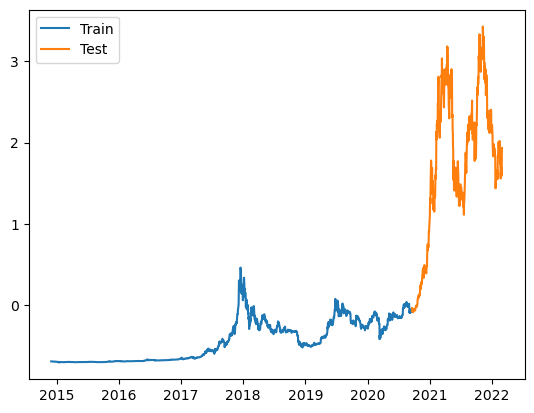

In [28]:
plt.plot(dates_train, y_train)
plt.plot(date_test, y_test)

plt.legend(['Train',  'Test'])

#### Building LSTM Model

Now use the Sequential and LSTM modules provided by Tensorflow Keras to build a simple, single-unit LSTM model.

In [29]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]),activation ='relu',return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', 
              optimizer=Adam(learning_rate=0.001))
model.summary



<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x000001968725C510>>

Fit the model

In [30]:
model.fit(X_train, y_train, epochs=100, batch_size =4, shuffle=False)

Epoch 1/100

530/530 [==============================] - 5s 4ms/step - loss: 0.1195
Epoch 2/100
530/530 [==============================] - 3s 6ms/step - loss: 0.0244
Epoch 3/100
530/530 [==============================] - 4s 7ms/step - loss: 0.0190
Epoch 4/100
530/530 [==============================] - 3s 6ms/step - loss: 0.0163
Epoch 5/100
530/530 [==============================] - 3s 6ms/step - loss: 0.0158
Epoch 6/100
530/530 [==============================] - 3s 5ms/step - loss: 0.0155
Epoch 7/100
530/530 [==============================] - 3s 6ms/step - loss: 0.0153
Epoch 8/100
530/530 [==============================] - 3s 5ms/step - loss: 0.0145
Epoch 9/100
530/530 [==============================] - 3s 5ms/step - loss: 0.0138
Epoch 10/100
530/530 [==============================] - 2s 4ms/step - loss: 0.0139
Epoch 11/100
530/530 [==============================] - 3s 5ms/step - loss: 0.0136
Epoch 12/100
530/530 [==============================] - 3s 5ms/step - loss: 0.0135
Epoch 13/100

530/530 [==============================] - 2s 4ms/step - loss: 0.0110
Epoch 98/100
530/530 [==============================] - 2s 4ms/step - loss: 0.0109
Epoch 99/100
530/530 [==============================] - 2s 4ms/step - loss: 0.0109
Epoch 100/100
530/530 [==============================] - 2s 4ms/step - loss: 0.0110


In [31]:
y_predict = model.predict(X_test)

17/17 [==============================] - 1s 4ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

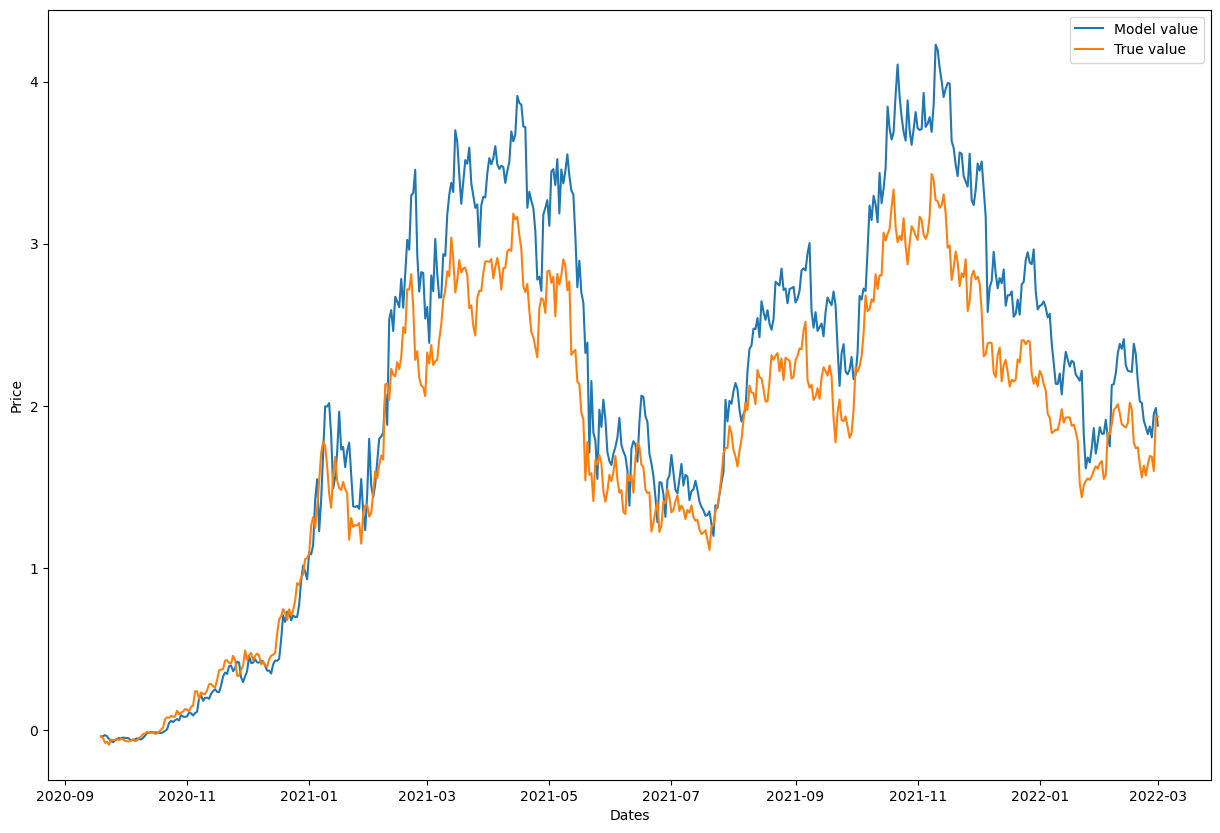

In [32]:
plt.figure(figsize=(15,10))
plt.plot(date_test, y_predict[:,0,0])
plt.plot(date_test, y_test)
plt.xlabel('Dates')
plt.ylabel('Price')
plt.legend(['Model value', 'True value'])
plt.show

Evaluate the performance of LSTM using mean squared error

In [33]:
rmse = mean_squared_error(y_test,y_predict[:,0,0],squared=False)
rmse

0.43790600230473237

## Simple Moving Average for Stock Prediction

Let’s look at how better or worse LSTMs perform compared with statistical technique such as SMA.

In [34]:
split_index = int(np.ceil(len(df_bitcoin_sc)*train_split))

train = df_bitcoin_sc[['close']].iloc[:split_index]
test = df_bitcoin_sc[['close']].iloc[split_index:]

prediction = np.array([train.rolling(100).mean().iloc[-1]]*len(test)).reshape((-1,1))

mse = mean_squared_error(test,prediction,squared=False)
mse

2.065719208442753

<function matplotlib.pyplot.show(close=None, block=None)>

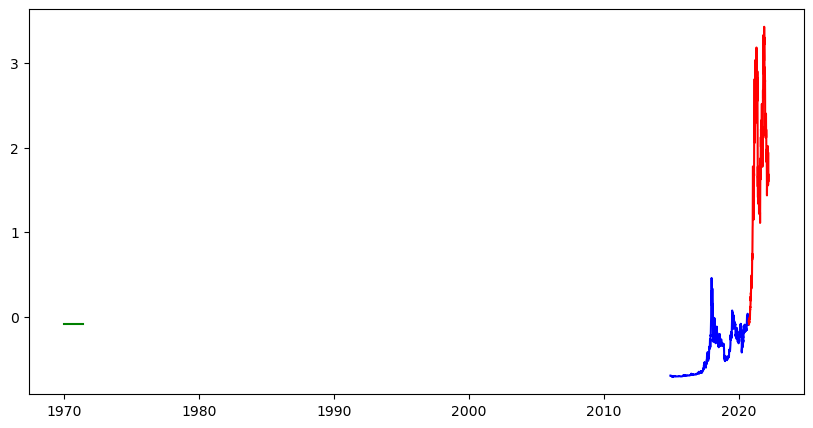

In [35]:
plt.figure(figsize=(10,5))
plt.plot(train,'b')
plt.plot(prediction,'g')
plt.plot(test,'r')
plt.show

It is clear that after evaluating two models with mean squared error, LSTM shows better performance than SMA or other statistical techniques.
We can improve our LSTM model by finetuning the hyperparameters such as the number of cells, batch size, or the loss function. However, using data between 5 - 10 years would greatly help the model.